----

-----


# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


## Inicialización

In [102]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

## Cargar datos

In [103]:
# Carga los archivos de datos en diferentes DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_msg = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [104]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [105]:
# Imprime una muestra de los datos para las tarifas
print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*Este DataFrame es muy simple porque la empresa solo tiene dos planes, y acá encontramos la información detallada de cada uno. No hay que corregir ningún dato del DF.*

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [106]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [107]:
# Imprime una muestra de datos para usuarios
print(df_users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*Vemos que hay 466 datos nulos en la columna `churn_date`. Sin embargo, para el análisis, estos datos se pueden dejar así sin ningún inconveniente. En el resto de las columnas la información está completa.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [108]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [109]:
# Imprime una muestra de datos para las llamadas
print(df_calls.head(10))

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*Es un DataFrame con la información de minutos utilizados por cada usuario. No hay ningún problema con los datos en el DataFrame.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [110]:
df_calls['min'] = np.ceil(df_calls['duration'])
df_calls = df_calls.drop('duration', axis=1)

print(df_calls.head(10))

         id  user_id   call_date   min
0   1000_93     1000  2018-12-27   9.0
1  1000_145     1000  2018-12-27  14.0
2  1000_247     1000  2018-12-27  15.0
3  1000_309     1000  2018-12-28   6.0
4  1000_380     1000  2018-12-30   5.0
5  1000_388     1000  2018-12-31   3.0
6  1000_510     1000  2018-12-27   6.0
7  1000_521     1000  2018-12-28  15.0
8  1000_530     1000  2018-12-28   6.0
9  1000_544     1000  2018-12-26   5.0


## Mensajes

In [111]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(df_msg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [112]:
# Imprime una muestra de datos para los mensajes
print(df_msg.head(10))

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*El DataFrame muestra el envío de mensajes de texto por cada usuario. No hay ningún problema con los datos.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [46]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [47]:
# Imprime una muestra de datos para el tráfico de internet
print(df_internet.head(10))

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

*El DataFrame muestra la cantidad de datos utilizado por cada uno de los usuarios. No hay ningún problema con los datos.*

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [61]:
df_internet['gb_used'] = np.ceil(df_internet['mb_used']/1024)
df_internet = df_internet.drop('mb_used', axis=1)
print(df_internet.head(10))

         id  user_id session_date  gb_used
0   1000_13     1000   2018-12-29      1.0
1  1000_204     1000   2018-12-31      0.0
2  1000_379     1000   2018-12-28      1.0
3  1000_413     1000   2018-12-26      1.0
4  1000_442     1000   2018-12-27      1.0
5    1001_0     1001   2018-08-24      1.0
6    1001_3     1001   2018-12-09      1.0
7    1001_4     1001   2018-11-04      1.0
8   1001_10     1001   2018-11-27      1.0
9   1001_15     1001   2018-12-13      1.0


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [13]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [29]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['month'] = pd.to_datetime(df_calls['call_date']).dt.month
calls_user = df_calls.groupby(['user_id', 'month'])['id'].count()
calls_user

user_id  month
1000     12       16
1001     8        27
         9        49
         10       65
         11       64
                  ..
1498     12       39
1499     9        41
         10       53
         11       45
         12       65
Name: id, Length: 2258, dtype: int64

In [30]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
min_user = df_calls.groupby(['user_id', 'month'])['min'].sum()
min_user

user_id  month
1000     12       124.0
1001     8        182.0
         9        315.0
         10       393.0
         11       426.0
                  ...  
1498     12       339.0
1499     9        346.0
         10       385.0
         11       308.0
         12       496.0
Name: min, Length: 2258, dtype: float64

In [31]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_msg['month'] = pd.to_datetime(df_msg['message_date']).dt.month
msg_user = df_msg.groupby(['user_id', 'month'])['id'].count()
msg_user

user_id  month
1000     12       11
1001     8        30
         9        44
         10       53
         11       36
                  ..
1496     9        21
         10       18
         11       13
         12       11
1497     12       50
Name: id, Length: 1806, dtype: int64

In [62]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_internet['month'] = pd.to_datetime(df_internet['session_date']).dt.month
int_user = df_internet.groupby(['user_id', 'month'])['gb_used'].sum()
int_user

user_id  month
1000     12        4.0
1001     8        21.0
         9        41.0
         10       50.0
         11       49.0
                  ... 
1498     12       56.0
1499     9        37.0
         10       52.0
         11       43.0
         12       58.0
Name: gb_used, Length: 2277, dtype: float64

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [63]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_users_usage = pd.concat([calls_user, min_user, msg_user, int_user], axis=1)
df_users_usage.columns=['cant_calls', 'min', 'cant_msg', 'cant_GB']
df_users_usage

cant_calls    min  cant_msg  cant_GB
user_id month                                      
1000    12           16.0  124.0      11.0      4.0
1001    8            27.0  182.0      30.0     21.0
        9            49.0  315.0      44.0     41.0
        10           65.0  393.0      53.0     50.0
        11           64.0  426.0      36.0     49.0
...                   ...    ...       ...      ...
1498    12           39.0  339.0       NaN     56.0
1499    9            41.0  346.0       NaN     37.0
        10           53.0  385.0       NaN     52.0
        11           45.0  308.0       NaN     43.0
        12           65.0  496.0       NaN     58.0

[2293 rows x 4 columns]

In [64]:
# Añade la información de la tarifa
users_plans = df_users[['user_id', 'plan', 'city']]
df_users_usage = df_users_usage.reset_index(drop=False)
df_usage_plans = df_users_usage.merge(users_plans, on='user_id', how='left')
df_complete = df_usage_plans.merge(df_plans, left_on='plan', right_on='plan_name', how='left')
df_complete = df_complete.drop('plan_name', axis=1)

print(df_complete.info())
print()
df_complete

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   cant_calls             2258 non-null   float64
 3   min                    2258 non-null   float64
 4   cant_msg               1806 non-null   float64
 5   cant_GB                2277 non-null   float64
 6   plan                   2293 non-null   object 
 7   city                   2293 non-null   object 
 8   messages_included      2293 non-null   int64  
 9   mb_per_month_included  2293 non-null   int64  
 10  minutes_included       2293 non-null   int64  
 11  usd_monthly_pay        2293 non-null   int64  
 12  usd_per_gb             2293 non-null   int64  
 13  usd_per_message        2293 non-null   float64
 14  usd_per_minute         2293 non-null   float64
dtypes: f

,user_id,month,cant_calls,min,cant_msg,cant_GB,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,4.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1001,8,27.0,182.0,30.0,21.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
2,1001,9,49.0,315.0,44.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
3,1001,10,65.0,393.0,53.0,50.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
4,1001,11,64.0,426.0,36.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,56.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03
2289,1499,9,41.0,346.0,NaN,37.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03
2290,1499,10,53.0,385.0,NaN,52.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03
2291,1499,11,45.0,308.0,NaN,43.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [66]:
# Calcula el ingreso mensual para cada usuario
df_complete['cant_msg'] = df_complete['cant_msg'].fillna(0)
df_complete['cant_calls'] = df_complete['cant_calls'].fillna(0)
df_complete['cant_MB'] = df_complete['cant_GB'].fillna(0)
df_complete['min'] = df_complete['min'].fillna(0)
df_complete['exceso_min'] = df_complete.apply(lambda x: max(x['min'] - x['minutes_included'], 0), axis=1)
df_complete['exceso_msg'] = df_complete.apply(lambda x: max(x['cant_msg'] - x['messages_included'], 0), axis=1)
df_complete['exceso_GB'] = df_complete.apply(lambda x: max(x['cant_MB'] - x['mb_per_month_included'], 0), axis=1) / 1000
df_complete['ingreso_user'] = df_complete['usd_monthly_pay'] + (df_complete['exceso_min'] * df_complete['usd_per_minute']) + (df_complete['exceso_msg'] * df_complete['usd_per_message']) + (df_complete['exceso_GB'] * df_complete['usd_per_gb'])
df_complete

,user_id,month,cant_calls,min,cant_msg,cant_GB,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,cant_MB,exceso_min,exceso_msg,exceso_GB,ingreso_user
0,1000,12,16.0,124.0,11.0,4.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,4.0,0.0,0.0,0.0,70.00
1,1001,8,27.0,182.0,30.0,21.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,21.0,0.0,0.0,0.0,20.00
2,1001,9,49.0,315.0,44.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,41.0,0.0,0.0,0.0,20.00
3,1001,10,65.0,393.0,53.0,50.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,50.0,0.0,3.0,0.0,20.09
4,1001,11,64.0,426.0,36.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,49.0,0.0,0.0,0.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,56.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,56.0,0.0,0.0,0.0,20.00
2289,1499,9,41.0,346.0,0.0,37.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,37.0,0.0,0.0,0.0,20.00
2290,1499,10,53.0,385.0,0.0,52.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,52.0,0.0,0.0,0.0,20.00
2291,1499,11,45.0,308.0,0.0,43.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,43.0,0.0,0.0,0.0,20.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

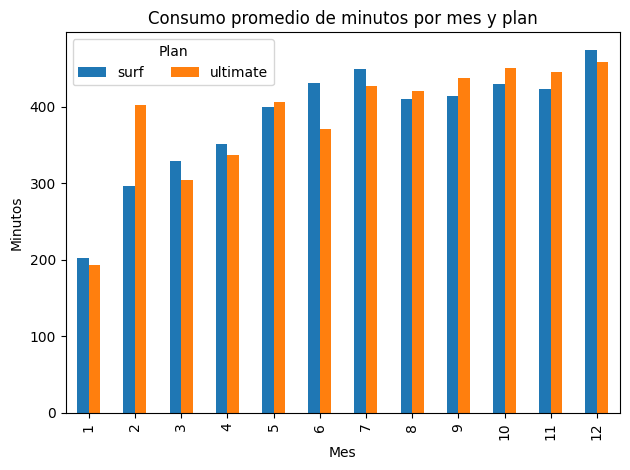

In [67]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_calls_month = df_complete.groupby(['month', 'plan'])['min'].mean()
df_calls_month_pivot = df_calls_month.unstack()
df_calls_month_pivot.plot(kind='bar', 
                          title='Consumo promedio de minutos por mes y plan', 
                          xlabel='Mes', 
                          ylabel='Minutos' 
                          )
plt.legend(title='Plan', ncol=2)
plt.tight_layout()
plt.show()

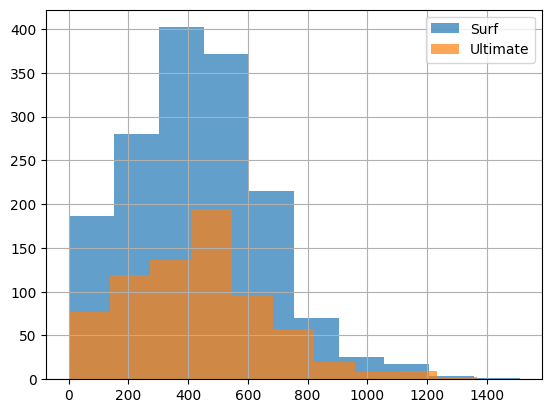

In [68]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
df_complete[df_complete['plan'] == 'surf']['min'].hist(alpha=0.7, label='Surf')
df_complete[df_complete['plan'] == 'ultimate']['min'].hist(alpha=0.7, label='Ultimate')
plt.legend()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

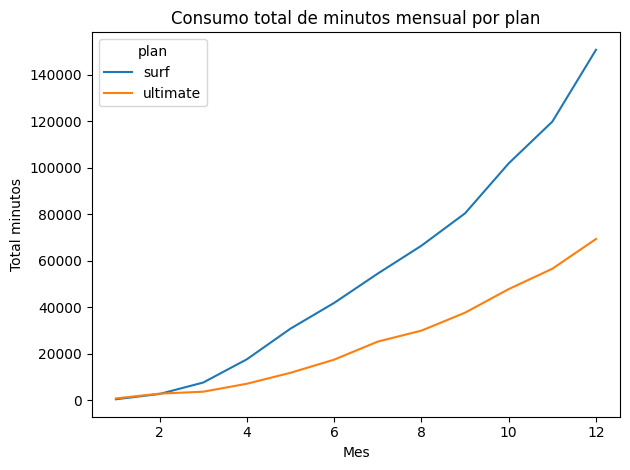

In [69]:
df_min_month = df_complete.groupby(['month', 'plan'])['min'].sum()
df_min_month_pivot = df_min_month.unstack()
df_min_month_pivot.plot(title='Consumo total de minutos mensual por plan', 
                        ylabel='Total minutos', 
                        xlabel='Mes' 
                       )
plt.tight_layout()
plt.show()

In [70]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print('Estadísticas por plan: ')
print(df_complete.groupby('plan')['min'].agg(['mean', 'var']))

print('\nEstadísticas generales: ')
print(f"Media general: {df_complete['min'].mean():.2f} minutos")
print(f"Varianza general: {df_complete['min'].var():.2f}")

Estadísticas por plan: 
                mean           var
plan                              
surf      428.749523  54968.279461
ultimate  430.450000  57844.464812

Estadísticas generales: 
Media general: 429.28 minutos
Varianza general: 55847.18


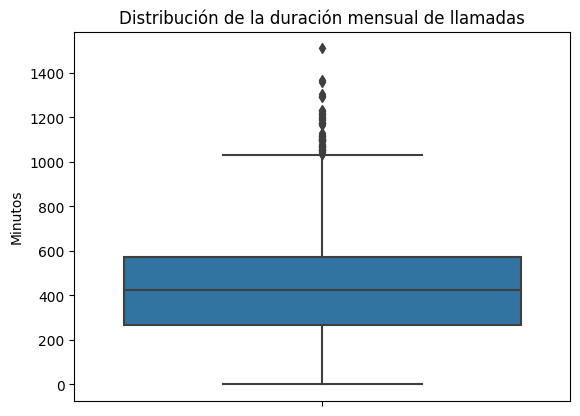

In [71]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=df_complete, y='min')
plt.title('Distribución de la duración mensual de llamadas')
plt.ylabel('Minutos')
plt.show()

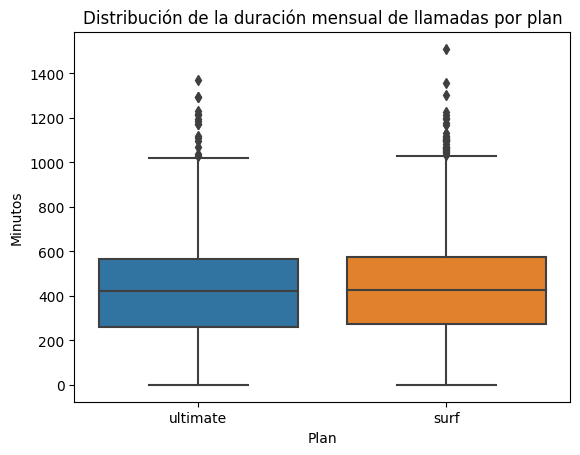

In [72]:
sns.boxplot(data=df_complete, x='plan', y='min')
plt.title('Distribución de la duración mensual de llamadas por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

*En el análisis vemos que los usuarios tienen un uso promedio de minutos por mes muy similar en los dos planes, y el promedio general por plan es prácticamente igual: 428min para surf, 430min para ultimate. Sin embargo, los usuarios del plan surf tienen un cosumo mucho más elevado de minutos en el año, tanto que en el mes 12 prácticamente ha duplicado el consumo de minutos de los usuarios del plan ultimate.*

### Mensajes

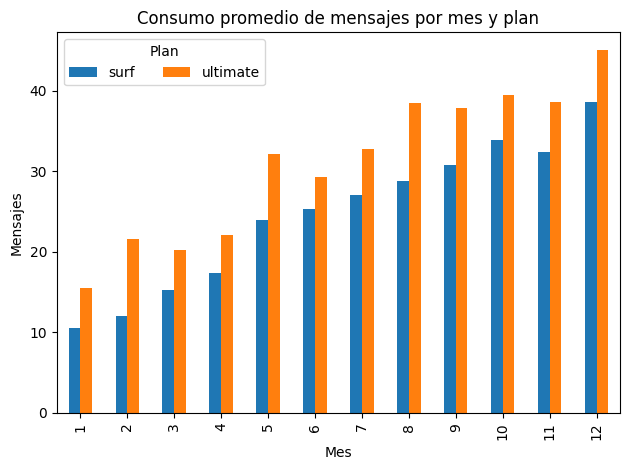

In [73]:
df_msg_av_month = df_complete.groupby(['month', 'plan'])['cant_msg'].mean()
df_msg_av_month_pivot = df_msg_av_month.unstack()
df_msg_av_month_pivot.plot(kind='bar',
                          title='Consumo promedio de mensajes por mes y plan',
                          xlabel='Mes',
                          ylabel='Mensajes'
                          )
plt.legend(title='Plan', ncol=2)
plt.tight_layout()
plt.show()

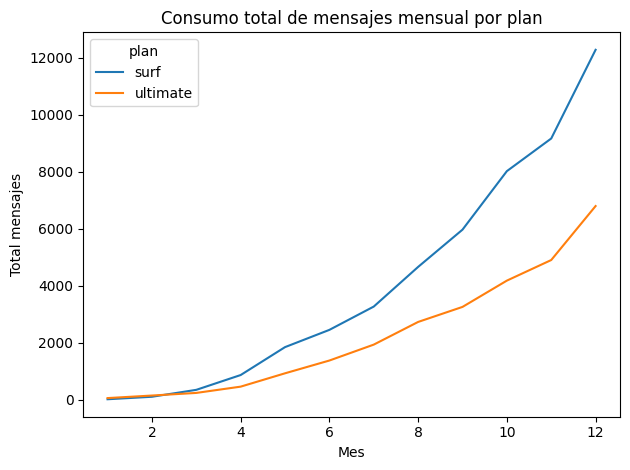

In [74]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_msg_month = df_complete.groupby(['month', 'plan'])['cant_msg'].sum()
df_msg_month_pivot = df_msg_month.unstack()
df_msg_month_pivot.plot(title='Consumo total de mensajes mensual por plan',
                        ylabel='Total mensajes',
                        xlabel='Mes'
                       )
plt.tight_layout()
plt.show()

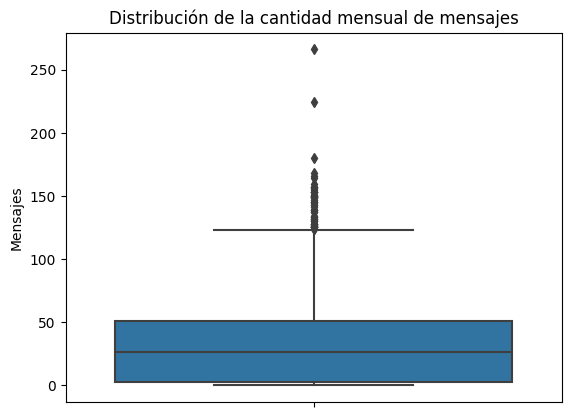

In [75]:
sns.boxplot(data=df_complete, y='cant_msg')
plt.title('Distribución de la cantidad mensual de mensajes')
plt.ylabel('Mensajes')
plt.show()

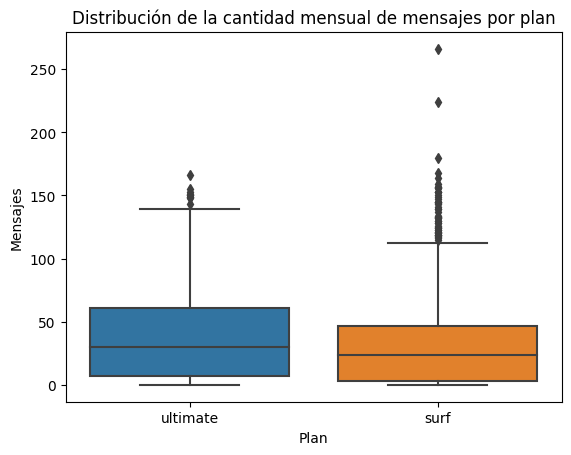

In [76]:
sns.boxplot(data=df_complete, x='plan', y='cant_msg')
plt.title('Distribución de la cantidad mensual de mensajes por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes')
plt.show()

In [77]:
print('Estadísticas por plan: ')
print(df_complete.groupby('plan')['cant_msg'].agg(['mean', 'var']))

print('\nEstadísticas generales: ')
print(f"Media general: {df_complete['cant_msg'].mean():.2f} mensajes")
print(f"Varianza general: {df_complete['cant_msg'].var():.2f}")

Estadísticas por plan: 
               mean          var
plan                            
surf      31.159568  1126.724522
ultimate  37.551389  1208.756744

Estadísticas generales: 
Media general: 33.17 mensajes
Varianza general: 1160.77


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

*En mensajes, vemos una diferencia algo significativa entre los dos planes, donde algunos usuarios del plan surf tienden a enviar una cantidad elevada de mensajes. Sin embargo, la gran mayoría de usuarios en los dos planes envían menos de 50 mensajes en promedio.*

### Internet

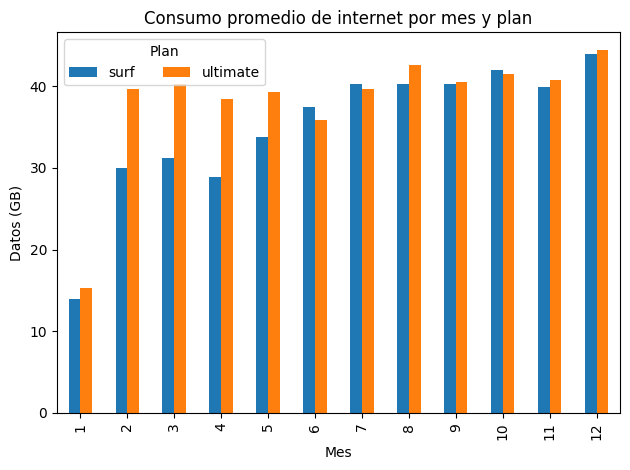

In [79]:
df_int_av_month = df_complete.groupby(['month', 'plan'])['cant_MB'].mean()
df_int_av_month_pivot = df_int_av_month.unstack()
df_int_av_month_pivot.plot(kind='bar',
                          title='Consumo promedio de internet por mes y plan',
                          xlabel='Mes',
                          ylabel='Datos (GB)'
                          )
plt.legend(title='Plan', ncol=2)
plt.tight_layout()
plt.show()

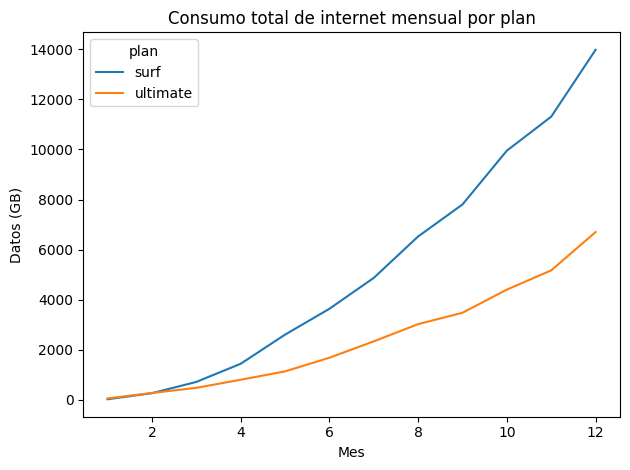

In [80]:
df_int_month = df_complete.groupby(['month', 'plan'])['cant_MB'].sum()
df_int_month_pivot = df_int_month.unstack()
df_int_month_pivot.plot(title='Consumo total de internet mensual por plan',
                        ylabel='Datos (GB)',
                        xlabel='Mes'
                       )
plt.tight_layout()
plt.show()

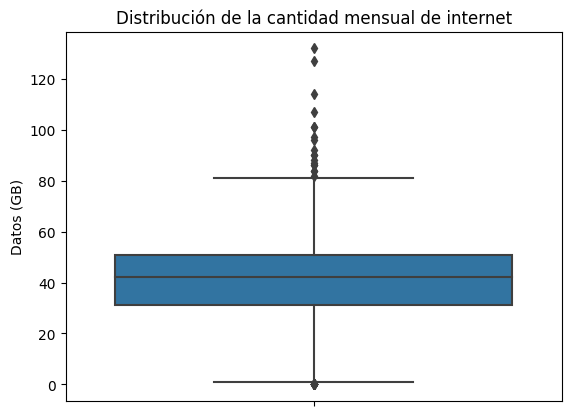

In [81]:
sns.boxplot(data=df_complete, y='cant_MB')
plt.title('Distribución de la cantidad mensual de internet')
plt.ylabel('Datos (GB)')
plt.show()

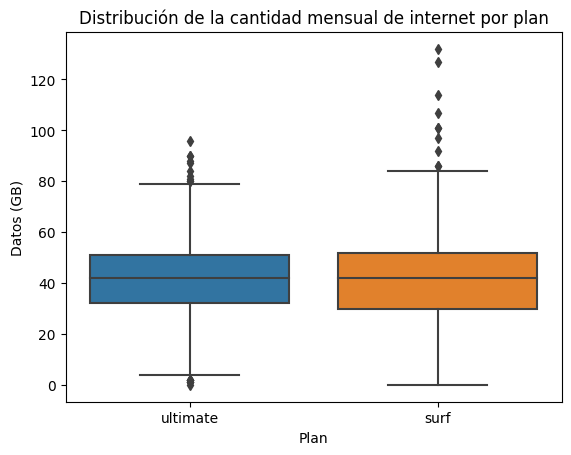

In [82]:
sns.boxplot(data=df_complete, x='plan', y='cant_MB')
plt.title('Distribución de la cantidad mensual de internet por plan')
plt.xlabel('Plan')
plt.ylabel('Datos (GB)')
plt.show()

In [83]:
print('Estadísticas por plan: ')
print(df_complete.groupby('plan')['cant_GB'].agg(['mean', 'var']))

print('\nEstadísticas generales: ')
print(f"Media general: {df_complete['cant_GB'].mean():.2f} MB")
print(f"Varianza general: {df_complete['cant_GB'].var():.2f}")

Estadísticas por plan: 
               mean         var
plan                           
surf      40.526958  305.726633
ultimate  41.137691  271.224747

Estadísticas generales: 
Media general: 40.72 MB
Varianza general: 294.79


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

*Nuevamente vemos un comportamiento muy similar entre los usuarios de ambos planes. Sin embargo, es importante resaltar que los usuarios del plan surf están consumiendo en promedio más de los datos incluídos en su plan.*

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

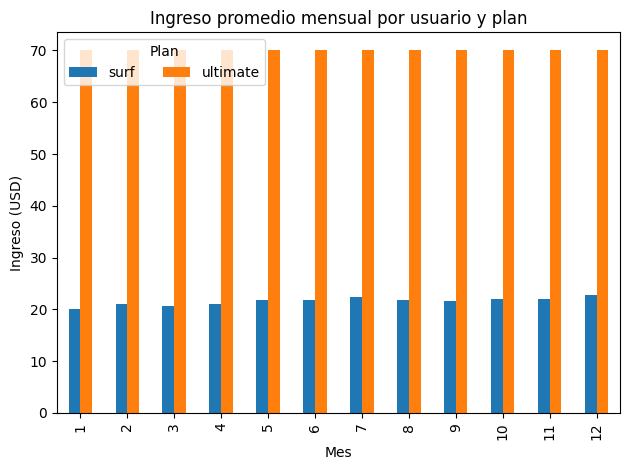

In [84]:
df_ing_av_month = df_complete.groupby(['month', 'plan'])['ingreso_user'].mean()
df_ing_av_month_pivot = df_ing_av_month.unstack()
df_ing_av_month_pivot.plot(kind='bar',
                          title='Ingreso promedio mensual por usuario y plan',
                          xlabel='Mes',
                          ylabel='Ingreso (USD)'
                          )
plt.legend(title='Plan', ncol=2)
plt.tight_layout()
plt.show()

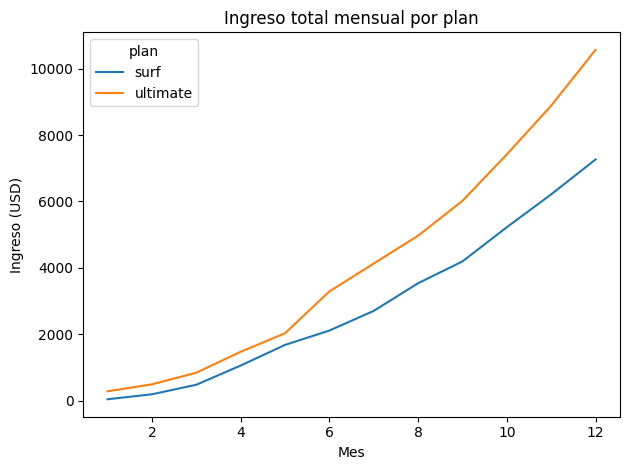

In [85]:
df_ing_month = df_complete.groupby(['month', 'plan'])['ingreso_user'].sum()
df_ing_month_pivot = df_ing_month.unstack()
df_ing_month_pivot.plot(title='Ingreso total mensual por plan',
                        ylabel='Ingreso (USD)',
                        xlabel='Mes'
                       )
plt.tight_layout()
plt.show()

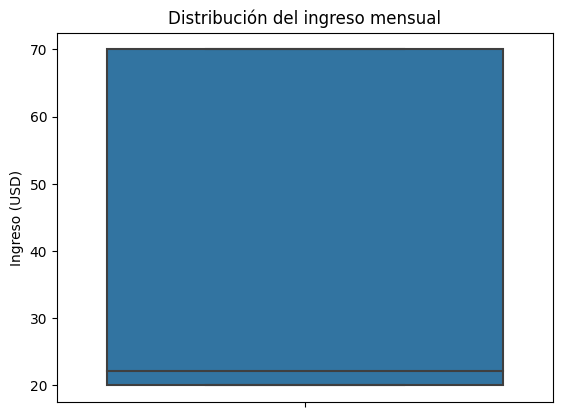

In [86]:
sns.boxplot(data=df_complete, y='ingreso_user')
plt.title('Distribución del ingreso mensual')
plt.ylabel('Ingreso (USD)')
plt.show()

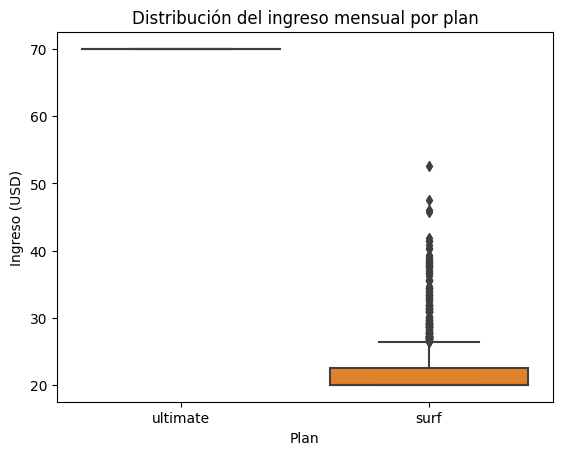

In [87]:
sns.boxplot(data=df_complete, x='plan', y='ingreso_user')
plt.title('Distribución del ingreso mensual por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso (USD)')
plt.show()

In [88]:
print('Estadísticas por plan: ')
print(df_complete.groupby('plan')['ingreso_user'].agg(['mean', 'var', 'std']))

print('\nEstadísticas generales: ')
print(f"Media general: {df_complete['ingreso_user'].mean():.2f} USD")
print(f"Varianza general: {df_complete['ingreso_user'].var():.2f}")
print(f"Desviación estándar: {np.sqrt(df_complete['ingreso_user'].var()):.2f} USD")

Estadísticas por plan: 
               mean        var       std
plan                                    
surf      22.054151  15.642668  3.955081
ultimate  70.000000   0.000000  0.000000

Estadísticas generales: 
Media general: 37.11 USD
Varianza general: 506.12
Desviación estándar: 22.50 USD


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

*En cuánto a los ingresos, definitivamente el plan ultimate es el que está generando mayores ingresos para la compaañía. El ingreso promedio del plan surf es 22USD y el ingreso promedio del plan ultimate es 70USD, más de 3 veces comparado con el surf. Es importante resaltar que tenemos algunos usuarios del plan surf que están generando ingresos más altos del promedio, pero aún así están por debajo de los 70USD.*

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H₀ --> "Los ingresos promedios entre los dos planes son iguales"

H₁ --> "Si hay diferencia entre los ingresos promedios de los dos planes"

alpha = 0.05

In [127]:
# Prueba las hipótesis
ingresos_surf = df_complete[df_complete['plan'] == 'surf']['ingreso_user']
ingresos_ultimate = df_complete[df_complete['plan'] == 'ultimate']['ingreso_user']

estadistico, p_valor =st.levene(ingresos_surf, ingresos_ultimate)
print(f"Estadístico de Levene: {estadistico:.4f}, p-valor: {p_valor}")

resultado1 = st.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)
print(f"Estadístico t: {resultado1.statistic:.4f}")
print(f"Valor p: {resultado1.pvalue}")

Estadístico de Levene: 194.1707, p-valor: 2.0018830864206563e-42
Estadístico t: -480.7950
Valor p: 0.0


/tmp/ipykernel_32/3580279569.py:8: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  resultado1 = st.ttest_ind(ingresos_surf, ingresos_ultimate, equal_var=False)


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

H₀ --> "Los ingresos promedios entre las regiones son iguales"

H₁ --> "Si hay diferencia entre los ingresos promedios de las regiones"

alpha = 0.05

In [129]:
# Prueba las hipótesis
ny_nj_mask = df_complete['city'].str.contains('NY-NJ')
ingresos_ny_nj = df_complete[ny_nj_mask]['ingreso_user']
ingresos_otras = df_complete[~ny_nj_mask]['ingreso_user']

estadistico, p_valor =st.levene(ingresos_ny_nj, ingresos_otras)
print(f"Estadístico de Levene: {estadistico:.4f}, p-valor: {p_valor}")

resultado = st.ttest_ind(ingresos_ny_nj, ingresos_otras, equal_var=False)
print(f"Estadístico t: {resultado.statistic:.4f}")
print(f"Valor p: {resultado.pvalue:.4f}")

Estadístico de Levene: 49.1720, p-valor: 3.0735683684151828e-12
Estadístico t: -7.7713
Valor p: 0.0000


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

*El análisis de hipótesis nos permite concluir que estadísticamente los usuarios del plan ultimate generan muchos más ingresos que los usuarios del plan surf. Este resultado era de esperarse teniendo en cuenta que el ingreso promedio del plan ultimate es más de 3 veces el ingreso promedio del plan surf.*

*Por otro lado, el análisis nos permite inducir que los ingresos promedios de los usuarios de la región NY-NJ son significativamente menores a los ingresos promedios de los usuarios de las otras regiones, con una certeza del 99.99% (p casi igual a cero)*